# Moving averages

In [8]:
import csv
import pandas
import numpy
import matplotlib.pyplot as plt

In [9]:
def get_coin_dataframe(filename):    
    coin = pandas.read_csv(filename)
    coin['Date'] = pandas.to_datetime(coin['Date'])
    coin = coin.drop(["Open","High","Low","Volume","Market Cap"], axis=1)
    coin = coin.sort_values(by="Date", ascending=True)
    return coin
    
def calculate_moving_averages(coin):
    coin['Rolling Mean 5d'] = coin['Close'].rolling(5).mean()
    coin['Rolling Mean 21d'] = coin['Close'].rolling(21).mean()
    coin['Rolling Mean 90d'] = coin['Close'].rolling(90).mean()
    return coin;

def make_plot(coin, title, xlim):
    return coin.plot(
                title=title,
                x='Date', 
                y=['Close', 'Rolling Mean 5d', 'Rolling Mean 21d','Rolling Mean 90d'], 
                style=['x'],
                figsize=(20, 5),
                xlim=xlim)

def make_short_and_long_plot(coin, title, start_long, start_short, end):
    coin_plot = make_plot(coin, title, (start_long, end))
    coin_plot = make_plot(coin, title, (start_short, end))
    return coin_plot

def save_plot(coin_plot, filename):
    coin_fig = coin_plot.get_figure()
    coin_fig.savefig(filename)

# display(coin)

In [10]:
bitcoin = get_coin_dataframe("bitcoin.csv")
ethereum = get_coin_dataframe("ethereum.csv")
litecoin = get_coin_dataframe("litecoin.csv")
ripple = get_coin_dataframe("ripple.csv")

In [11]:
bitcoin = calculate_moving_averages(bitcoin)
ethereum = calculate_moving_averages(ethereum)
litecoin = calculate_moving_averages(litecoin)
ripple = calculate_moving_averages(ripple)

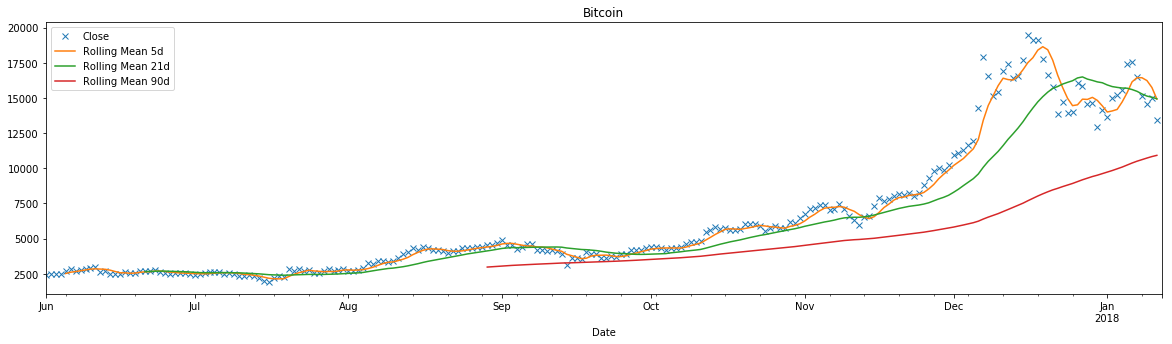

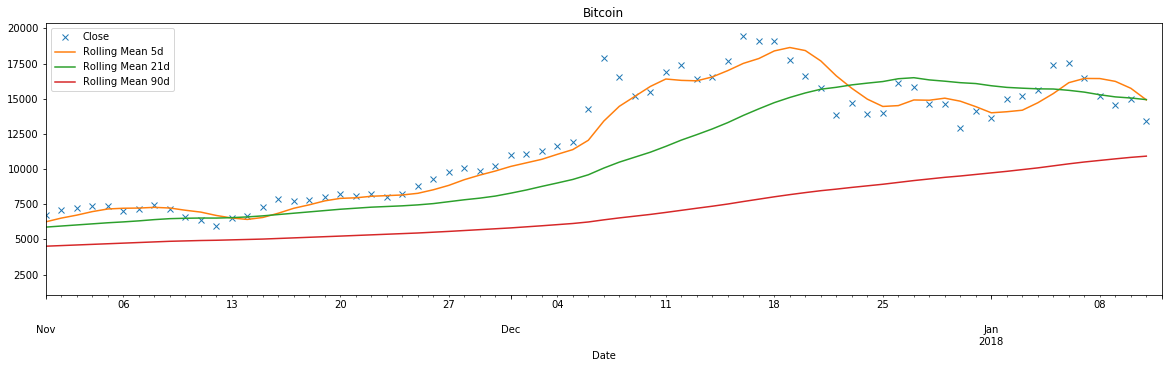

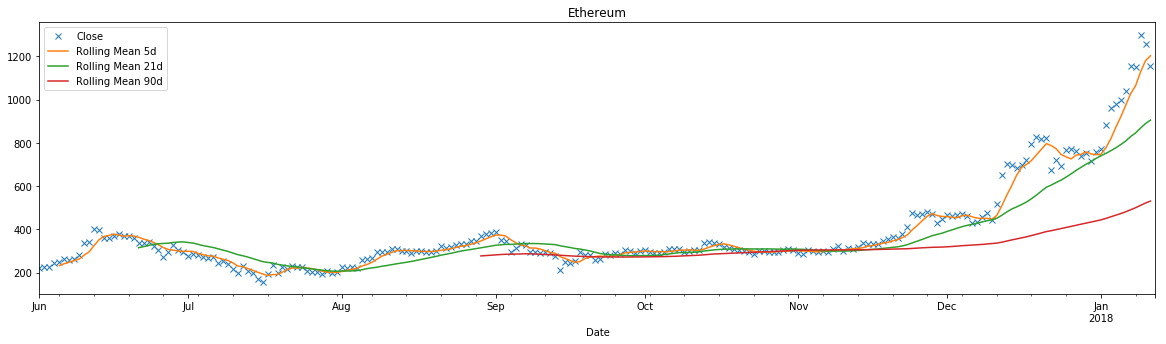

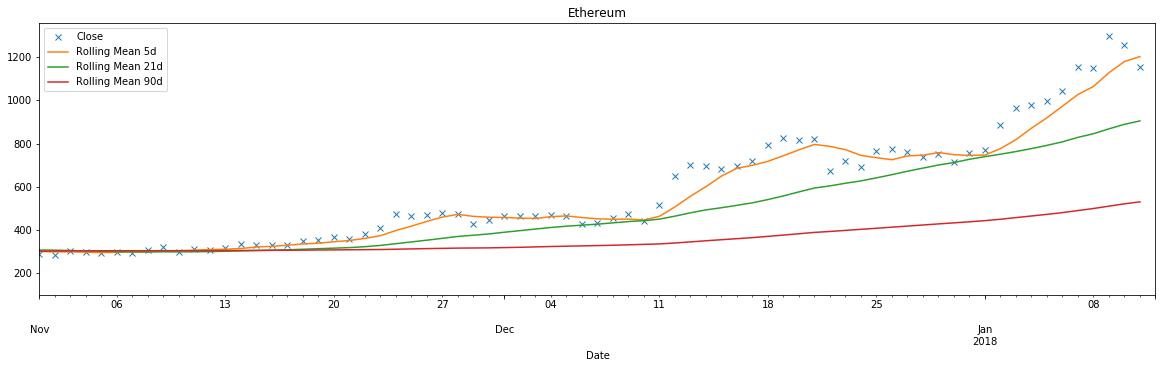

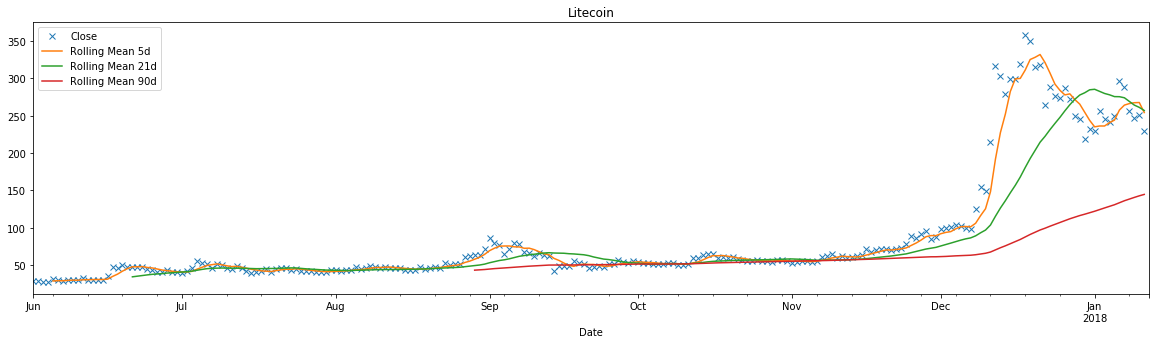

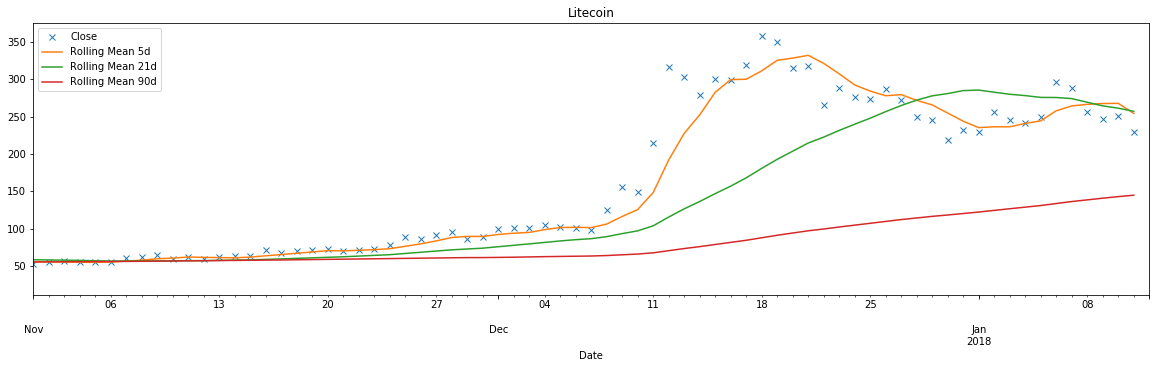

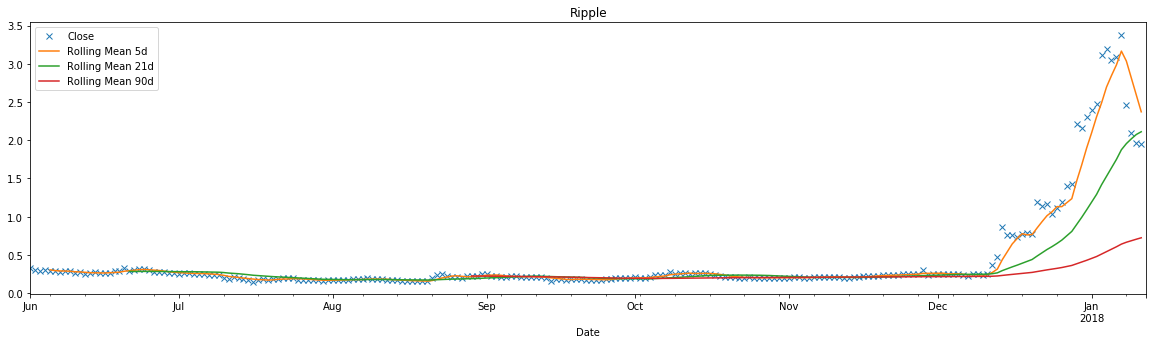

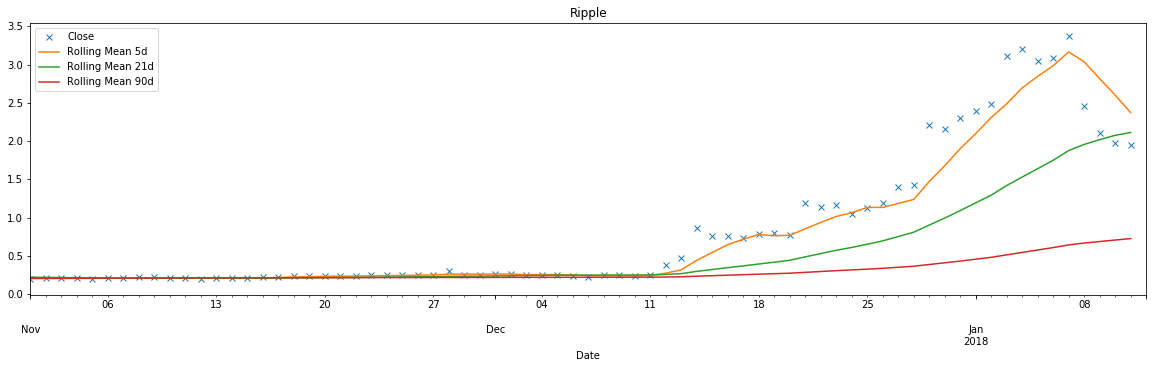

In [12]:
end = "2018-01-12"
start_long = "2017-06-01"
start_short = "2017-11-01"

bitcoin_plot = make_short_and_long_plot(bitcoin, "Bitcoin", start_long, start_short, end)
ethereum_plot = make_short_and_long_plot(ethereum, "Ethereum", start_long, start_short, end)
litecoin_plot = make_short_and_long_plot(litecoin, "Litecoin", start_long, start_short, end)
ripple_plot = make_short_and_long_plot(ripple, "Ripple", start_long, start_short, end)


In [13]:
# only save short plot because make plot return short only.
save_plot(bitcoin_plot, "bitcoin_graph.png")
save_plot(ethereum_plot, "ethereum_graph.png")
save_plot(litecoin_plot, "litecoin_graph.png")
save_plot(ripple_plot, "ripple_graph.png")